In [1]:
# import packages
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

   ###  Importing the STORES data

In [2]:
Frame_StoreData = pd.read_json(r"C:\Users\vinee\OneDrive\Desktop\Fulltime\Resume_2020\Engage3\stores.json")

In [3]:
Frame_StoreData.head()

,Store ID,Banner,Region
0,66999,Walmart,Northern California
1,4698,Trader Joes,Northern California
2,39482,Safeway,Northern California
3,34957,Whole Foods,Northern California
4,12837,Walmart,New York


###   Importing the PRICES data

In [4]:
Frame_PricesData = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\Fulltime\Resume_2020\Engage3\prices.csv')

In [5]:
Frame_PricesData.head()

,Auditor ID,Date,Price,Store ID,UPC
0,234,10/18/2017,24.95,66999,268588472
1,234,10/27/2017,49.71,66999,475245085
2,234,10/20/2017,25.75,66999,126967843
3,234,10/23/2017,18.81,66999,708930835
4,234,10/23/2017,33.32,66999,325885139


###  Importing the AUDITOR data

In [6]:
Frame_AuditorData = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\Fulltime\Resume_2020\Engage3\auditors.csv')

In [7]:
Frame_AuditorData.head()

,Auditor ID,First,Last,Region
0,234,Sue,Smith,Northern California
1,536,Bob,Smith,Northern California
2,98,Jack,Smith,New York
3,203,Jill,Smith,New York
4,304,Jerry,Johnson,Texas


# Variable Description  :

#### Merge_StorePrices : Stores the result of merging the Stores data and the Prices data on Store ID


In [8]:
# merge store and price data by the store ID 
Merge_StorePrices = pd.merge(Frame_StoreData, Frame_PricesData, on='Store ID')

In [9]:
Merge_StorePrices.head()

,Store ID,Banner,Region,Auditor ID,Date,Price,UPC
0,66999,Walmart,Northern California,234,10/18/2017,24.95,268588472
1,66999,Walmart,Northern California,234,10/27/2017,49.71,475245085
2,66999,Walmart,Northern California,234,10/20/2017,25.75,126967843
3,66999,Walmart,Northern California,234,10/23/2017,18.81,708930835
4,66999,Walmart,Northern California,234,10/23/2017,33.32,325885139


#### Merge_StorePricesAuditors: Stores the result of merging the Auditors data with the previously merged stores data and prices data on Auditor ID

In [10]:
# merge previous data with auditor data by auditor ID
Merge_StorePricesAuditors = pd.merge(Merge_StorePrices, Frame_AuditorData, on='Auditor ID')

In [11]:
Merge_StorePricesAuditors.head()

,Store ID,Banner,Region_x,Auditor ID,Date,Price,UPC,First,Last,Region_y
0,66999,Walmart,Northern California,234,10/18/2017,24.95,268588472,Sue,Smith,Northern California
1,66999,Walmart,Northern California,234,10/27/2017,49.71,475245085,Sue,Smith,Northern California
2,66999,Walmart,Northern California,234,10/20/2017,25.75,126967843,Sue,Smith,Northern California
3,66999,Walmart,Northern California,234,10/23/2017,18.81,708930835,Sue,Smith,Northern California
4,66999,Walmart,Northern California,234,10/23/2017,33.32,325885139,Sue,Smith,Northern California


#### Dropping the column Region_y from Merge_StorePricesAuditors

In [12]:
# drop the last columns which is aduitor's region, it gets less confuse with the price region
Merge_StorePricesAuditors = Merge_StorePricesAuditors.drop(['Region_y'], axis=1) 

In [13]:
Merge_StorePricesAuditors.head()

,Store ID,Banner,Region_x,Auditor ID,Date,Price,UPC,First,Last
0,66999,Walmart,Northern California,234,10/18/2017,24.95,268588472,Sue,Smith
1,66999,Walmart,Northern California,234,10/27/2017,49.71,475245085,Sue,Smith
2,66999,Walmart,Northern California,234,10/20/2017,25.75,126967843,Sue,Smith
3,66999,Walmart,Northern California,234,10/23/2017,18.81,708930835,Sue,Smith
4,66999,Walmart,Northern California,234,10/23/2017,33.32,325885139,Sue,Smith


#### Change the region_x to region in the dataframe Merge_StorePricesAuditors

In [14]:
# change the region_x to the region
Merge_StorePricesAuditors = Merge_StorePricesAuditors.rename(columns={"Region_x": "Region"})
Merge_StorePricesAuditors.head()

,Store ID,Banner,Region,Auditor ID,Date,Price,UPC,First,Last
0,66999,Walmart,Northern California,234,10/18/2017,24.95,268588472,Sue,Smith
1,66999,Walmart,Northern California,234,10/27/2017,49.71,475245085,Sue,Smith
2,66999,Walmart,Northern California,234,10/20/2017,25.75,126967843,Sue,Smith
3,66999,Walmart,Northern California,234,10/23/2017,18.81,708930835,Sue,Smith
4,66999,Walmart,Northern California,234,10/23/2017,33.32,325885139,Sue,Smith


## Variable Description  :

#### CrossTable: Form a crosstable dataframe with the index Banner and UPC, columns as Regions and the values as prices of the product.

In [15]:
# create the cross table
CrossTable = pd.crosstab([Merge_StorePricesAuditors.Banner, Merge_StorePricesAuditors.UPC], Merge_StorePricesAuditors.Region,values=Merge_StorePricesAuditors.Price, aggfunc='mean',colnames=['index'])

In [16]:
CrossTable.head()

index             Kansas  New York  Northern California  Texas
Banner  UPC                                                   
Safeway 11873171     NaN       NaN                 6.09   5.19
        15052612   53.99       NaN                  NaN  54.49
        16482322   17.89       NaN                  NaN  18.09
        16729338    7.99       NaN                 9.39   8.09
        16829288    3.59       NaN                 4.19   3.59

#### Reset the index in the crossTable

In [17]:
# reset the index
Table_IndexOrder = CrossTable.reset_index()

In [18]:
Table_IndexOrder.head()

index,Banner,UPC,Kansas,New York,Northern California,Texas
0,Safeway,11873171,NaN,NaN,6.09,5.19
1,Safeway,15052612,53.99,NaN,NaN,54.49
2,Safeway,16482322,17.89,NaN,NaN,18.09
3,Safeway,16729338,7.99,NaN,9.39,8.09
4,Safeway,16829288,3.59,NaN,4.19,3.59


#### Changing the column order in the crossTable and reindexing and sorting by UPC values according to the output

In [19]:
# change the columns order 
columnsTitles = ['Banner', 'UPC', 'Northern California','New York','Kansas','Texas']
# reindex the data
Table_IndexOrder = Table_IndexOrder.reindex(columns=columnsTitles)
# sort the data by UPC number
Table_IndexOrder = Table_IndexOrder.sort_values(by=['UPC'])
Table_IndexOrder.head()

index,Banner,UPC,Northern California,New York,Kansas,Texas
0,Safeway,11873171,6.09,NaN,NaN,5.19
1953,Walmart,11873171,5.53,NaN,NaN,4.75
3934,Whole Foods,11873171,NaN,5.69,1.99,5.49
977,Trader Joes,11873171,NaN,NaN,NaN,4.99
2938,Wegmans,11873171,NaN,5.19,NaN,5.09


#### Saving the output of the Table_IndexOrder dataframe to the csv file 

In [20]:
Table_IndexOrder.to_csv(r'C:\Users\vinee\OneDrive\Desktop\Fulltime\Resume_2020\Engage3\output1.csv', index=False)

In [21]:
Table_IndexOrder.head()

index,Banner,UPC,Northern California,New York,Kansas,Texas
0,Safeway,11873171,6.09,NaN,NaN,5.19
1953,Walmart,11873171,5.53,NaN,NaN,4.75
3934,Whole Foods,11873171,NaN,5.69,1.99,5.49
977,Trader Joes,11873171,NaN,NaN,NaN,4.99
2938,Wegmans,11873171,NaN,5.19,NaN,5.09


# Question 2

In [22]:
a = Table_IndexOrder[pd.notnull(Table_IndexOrder['Northern California'])&pd.notnull(Table_IndexOrder['Texas'])]

#### From the  information given in the question, The price a product = UPC * StoreMultiplier * RegionMultiplier. Let's try to estimate the relation between Region Multuipliers for  various regions by studying a few data points. Consider the first row in the Table_IndexOrder table to calculate the region multipler ratio

#### Here we are considering a single UPC under a single Banner across various regions. Thus, the UPC Price(U) and Store Multiplier are constant.

#### Lets suppose that the Store Multiplier for Safeway = S

#### The product Price in Northern california  = 6.09, Store multiplier = Safeway Multiplier, Region multiplier = Northern california(NC) Multiplier

#### The product Price in Texas = 5.19, Store Multiplier = Safeway, Region multiplier = Texas(T) Multiplier
#### 6.09 = UPC Price * S * NC --- Equation 1
#### 5.17 = UPC Price * S * T --- Equation 2

#### divide  Equation 1 by Equation 2 we get NC/T = 1.17(approx)

#### Now if we calculate for the entire dataset the mean ratio is 1.160, mode ratio is 1.61

#### That is region multiplier of Northern california is roughly 1.16  times region multiplier of Texas, indicatinng that the for a given product and banner the price in Northern California is greather than that in Texas.

#### On carefuly observation of data we see that there are only two price points where for for a given product and banner the price in Texas is greater than that in Northern California. This is an anaomoly and needs to be rechecked.

In [23]:
a['NC/T'] = ''

C:\Users\vinee\Anaconda5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
a['NC/T'] = a['Northern California']/a['Texas']

C:\Users\vinee\Anaconda5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
a.head()

index,Banner,UPC,Northern California,New York,Kansas,Texas,NC/T
0,Safeway,11873171,6.09,NaN,NaN,5.19,1.173410
1953,Walmart,11873171,5.53,NaN,NaN,4.75,1.164211
980,Trader Joes,16729338,8.89,7.89,7.59,7.69,1.156047
3,Safeway,16729338,9.39,NaN,7.99,8.09,1.160692
4,Safeway,16829288,4.19,NaN,3.59,3.59,1.167131


In [26]:
a['NC/T'].mode()

0    1.161663
dtype: float64

In [27]:
a['NC/T'].mean()

1.1604155060190635

In [28]:
a['NC/T'].std()

0.018377902750065706

In [29]:
a['NC/T'].var()

0.0003377473094908726

In [30]:
#anomalies
a[a['NC/T'] <1]

index,Banner,UPC,Northern California,New York,Kansas,Texas,NC/T
248,Safeway,269161785,40.29,NaN,48.89,49.39,0.815752
2234,Walmart,301161010,38.17,33.82,32.54,42.79,0.892031


#### checking the mean, count, max, min, 25%, 50%, 75% values in all the regions

In [31]:
Table_IndexOrder.describe()

index,UPC,Northern California,New York,Kansas,Texas
count,4.931000e+03,1634.000000,3025.000000,3087.000000,3765.000000
mean,5.088255e+08,35.437907,30.971137,21.390198,30.084550
std,2.878944e+08,19.586411,17.219599,18.610435,16.709557
min,1.187317e+07,0.690000,0.590000,0.690000,0.590000
25%,2.661121e+08,19.177500,16.790000,1.990000,16.290000
50%,5.090565e+08,34.840000,30.720000,17.690000,29.840000
75%,7.644589e+08,51.590000,45.190000,37.490000,44.060000
max,9.991851e+08,74.490000,66.090000,59.990000,63.890000


#### Visualizing the Table_IndexOrder

C:\Users\vinee\Anaconda5\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vinee\Anaconda5\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 34., 967.,  42.,  47.,  29.,  46.,  46.,  30.,  40.,  44.,  51.,
         49.,  46.,  56.,  51.,  54.,  44.,  35.,  46.,  52.,  44.,  37.,
         49.,  46.,  47.,  40.,  40.,  50.,  42.,  51.,  58.,  51.,  52.,
         48.,  34.,  38.,  48.,  42.,  51.,  41.,  42.,  42.,  49.,  49.,
         45.,  36.,  39.,  35.,  17.,  15.]),
 array([ 0.69 ,  1.876,  3.062,  4.248,  5.434,  6.62 ,  7.806,  8.992,
        10.178, 11.364, 12.55 , 13.736, 14.922, 16.108, 17.294, 18.48 ,
        19.666, 20.852, 22.038, 23.224, 24.41 , 25.596, 26.782, 27.968,
        29.154, 30.34 , 31.526, 32.712, 33.898, 35.084, 36.27 , 37.456,
        38.642, 39.828, 41.014, 42.2  , 43.386, 44.572, 45.758, 46.944,
        48.13 , 49.316, 50.502, 51.688, 52.874, 54.06 , 55.246, 56.432,
        57.618, 58.804, 59.99 ]),
 <a list of 50 Patch objects>)

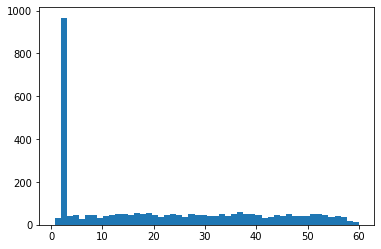

In [33]:
plt.hist(Table_IndexOrder['Kansas'], bins = 50)
#from the distribution we can say that prices in the kansas city are very less

In [34]:
Table_IndexOrder['Kansas'].value_counts()
#from the below value_counts 1.99 has 917 records out of 1102 which is 83%. 

1.99     917
17.89      8
16.29      8
7.79       7
56.69      7
        ... 
51.64      1
30.31      1
59.99      1
16.02      1
10.50      1
Name: Kansas, Length: 1102, dtype: int64

(array([27., 38., 31., 44., 24., 37., 24., 27., 31., 33., 37., 36., 29.,
        36., 48., 43., 28., 32., 49., 40., 28., 43., 47., 32., 32., 32.,
        42., 38., 39., 33., 49., 31., 39., 29., 31., 34., 33., 30., 38.,
        36., 35., 34., 32., 31., 24., 14., 17., 14., 16.,  7.]),
 array([ 0.69 ,  2.166,  3.642,  5.118,  6.594,  8.07 ,  9.546, 11.022,
        12.498, 13.974, 15.45 , 16.926, 18.402, 19.878, 21.354, 22.83 ,
        24.306, 25.782, 27.258, 28.734, 30.21 , 31.686, 33.162, 34.638,
        36.114, 37.59 , 39.066, 40.542, 42.018, 43.494, 44.97 , 46.446,
        47.922, 49.398, 50.874, 52.35 , 53.826, 55.302, 56.778, 58.254,
        59.73 , 61.206, 62.682, 64.158, 65.634, 67.11 , 68.586, 70.062,
        71.538, 73.014, 74.49 ]),
 <a list of 50 Patch objects>)

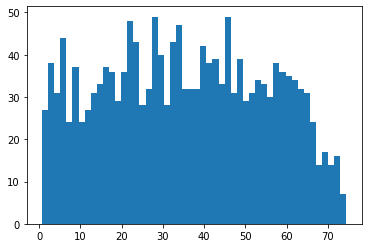

In [35]:
plt.hist(Table_IndexOrder['Northern California'], bins = 50)
#The values are spread out that means it has prices in all ranges in Northern california.

(array([ 60.,  92.,  81.,  90.,  67.,  75.,  62.,  64.,  65.,  73.,  98.,
         75.,  93., 104.,  94.,  95.,  71.,  68.,  91.,  84.,  94.,  89.,
         87.,  84.,  74.,  80.,  80.,  99.,  98.,  96., 104.,  79.,  64.,
         68.,  78.,  69.,  75.,  75.,  73.,  86.,  85.,  70.,  84.,  85.,
         67.,  46.,  38.,  13.,  13.,  10.]),
 array([ 0.59 ,  1.856,  3.122,  4.388,  5.654,  6.92 ,  8.186,  9.452,
        10.718, 11.984, 13.25 , 14.516, 15.782, 17.048, 18.314, 19.58 ,
        20.846, 22.112, 23.378, 24.644, 25.91 , 27.176, 28.442, 29.708,
        30.974, 32.24 , 33.506, 34.772, 36.038, 37.304, 38.57 , 39.836,
        41.102, 42.368, 43.634, 44.9  , 46.166, 47.432, 48.698, 49.964,
        51.23 , 52.496, 53.762, 55.028, 56.294, 57.56 , 58.826, 60.092,
        61.358, 62.624, 63.89 ]),
 <a list of 50 Patch objects>)

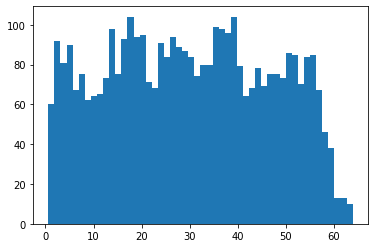

In [36]:
plt.hist(Table_IndexOrder['Texas'], bins = 50)
#The prices in Texas are spread out in all ranges.

(array([54., 68., 62., 64., 56., 62., 54., 57., 51., 70., 69., 65., 60.,
        84., 89., 81., 62., 61., 72., 74., 74., 62., 62., 56., 65., 60.,
        73., 73., 84., 74., 80., 67., 63., 56., 72., 48., 56., 62., 56.,
        79., 70., 61., 61., 56., 40., 28., 18., 26., 15., 13.]),
 array([ 0.59,  1.9 ,  3.21,  4.52,  5.83,  7.14,  8.45,  9.76, 11.07,
        12.38, 13.69, 15.  , 16.31, 17.62, 18.93, 20.24, 21.55, 22.86,
        24.17, 25.48, 26.79, 28.1 , 29.41, 30.72, 32.03, 33.34, 34.65,
        35.96, 37.27, 38.58, 39.89, 41.2 , 42.51, 43.82, 45.13, 46.44,
        47.75, 49.06, 50.37, 51.68, 52.99, 54.3 , 55.61, 56.92, 58.23,
        59.54, 60.85, 62.16, 63.47, 64.78, 66.09]),
 <a list of 50 Patch objects>)

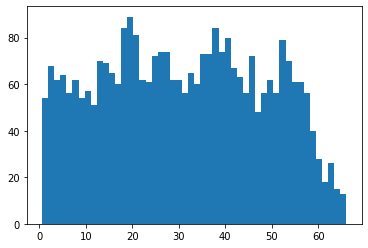

In [75]:
plt.hist(Table_IndexOrder['New York'], bins = 50)
#The prices in New York are spread out in all ranges.

#### From the above Histogram Distributions it is evident that the Product Price data is Spread out uniformly in Northern california, Texas, New York regions. However, Products Price Points in the Kansas regions are highly skewed with 1.99 being the most predominant price point.

#### From the describe table above , we can see that the mean product price in the Kansas  is 21.39, max product price is 59, 75% value is 37.49 and 25% is 1.99. However, there is a considerable difference in the25%, 50%, mean and max value for the other regions.

#### From the data we can say that the average product price in the Northern California  is higher than Kansas, New York and Texas. 

# Heat map


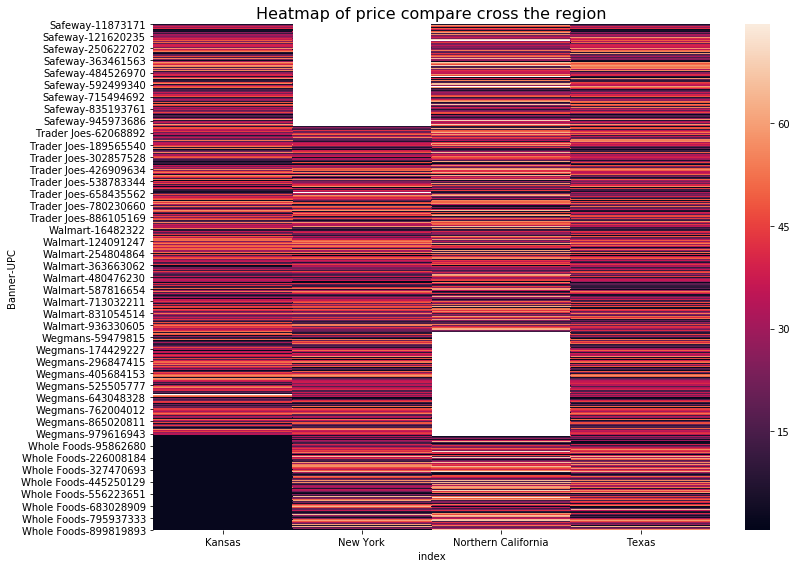

In [37]:
Plot_CrossHeatMap=plt.figure(figsize=(12,8))
ax=Plot_CrossHeatMap.add_subplot(111)
sns.heatmap(CrossTable, cbar=True)
ax.set_title("Heatmap of price compare cross the region",fontsize = 16)
plt.tight_layout()
plt.show()



#### From the heatmap , we can see that there are'nt any price points under Wholefoods banner in Kansas, Safeway banner in New York, and Wegmans banner in Northern California. This hints that either data is missing or the absence of these banners in those States, and thus warrants a data recheck.

# Summary on anomalies

####  The pricepoint , 1.99 , gets repeated a 917 times in Kansas , amouting to a whooping 83% of the price points. This clearly indicates an anomoly and points to a systemic error in data collection as a single value has got repeated so many times.

#### There are'nt any data point for Wegmans Banner in Northern california and for Safeway Banner in New York , indicating that either the data was'nt colleceted or that there are'nt any Safeway stores in New York , and Wegmans Stores in Northern california.

#### For Kansas less correlation with the prices in Whole Foods banner